<a href="https://colab.research.google.com/github/rukka0808/python_code/blob/main/data%20visualization/Dual_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!ls -al '/gdrive/My Drive/data'

total 2268857
-rw------- 1 root root    337847 Jun 18 04:24 data_202001.csv
-rw------- 1 root root    314682 Jun 18 04:24 data_202002.csv
-rw------- 1 root root    335953 Jun 18 04:24 data_202003.csv
-rw------- 1 root root   4052564 Jun 18 04:24 data_2020.csv
-rw------- 1 root root    337176 Jun 25 03:40 output.csv
-rw------- 1 root root 757939580 Feb 14 23:37 TCS_11_03_02_339640.csv
-rw------- 1 root root 732586920 Mar 14 23:42 TCS_11_03_02_663167.csv
-rw------- 1 root root 827403150 Apr 14 23:36 TCS_11_03_02_717062.csv


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,956 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and d

In [ ]:
# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Load a file under "data" folder
file = "/gdrive/My Drive/data/data_2020.csv"
data = pd.read_csv(file)

In [ ]:
data_06_22 = data[data.집계시.isin(range(6,23))]

In [ ]:
data_06_22.sort_values(by='집계시')

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
82028,20200715,6,101,140,16775,2
125225,20201026,6,101,110,5101,0
66049,20200609,6,101,105,713,1
66048,20200609,6,101,105,816,1
76951,20200704,6,101,135,10050,5
...,...,...,...,...,...,...
74174,20200628,22,101,105,765,6
74175,20200628,22,101,105,870,6
74176,20200628,22,101,105,849,6
107489,20200915,22,101,115,6371,1


In [ ]:
data_06_22_counting = data_06_22['집계시'].value_counts()

In [ ]:
data_06_22_counting

13    7092
14    7091
12    7089
15    7078
11    7059
10    7038
16    7011
9     7008
17    6919
8     6849
18    6742
19    6627
7     6614
20    6518
21    6284
22    6130
6     6095
Name: 집계시, dtype: int64

In [ ]:
x = data_06_22_counting.index
x = [str(i) for i in x]

In [ ]:
y = data_06_22_counting.values

In [ ]:
ratio = y / y.sum()
ratio_sum = ratio.cumsum()

[0.  0.2 0.4 0.6 0.8 1.  1.2]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_

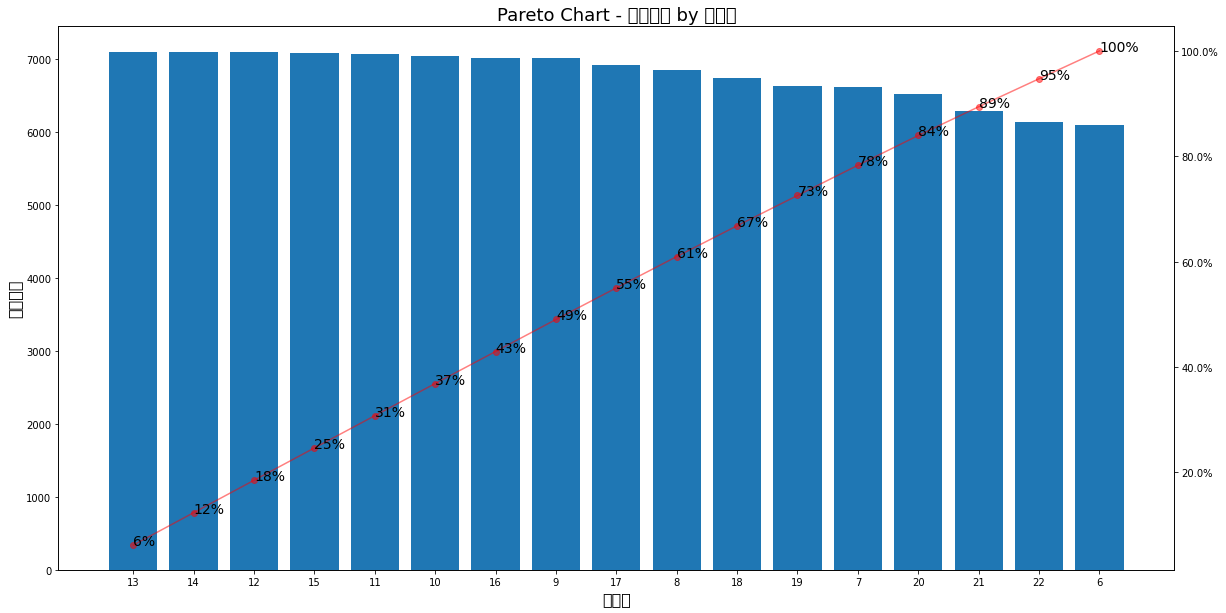

In [ ]:
# Configure figure size
fig, barChart = plt.subplots(figsize=(20,10))
# Creae bar Chart
barChart.bar(x, y)
# Creae line Chart
lineChart = barChart.twinx()
lineChart.plot(x, ratio_sum, '-ro', alpha=0.5)
# Creae right side labels
ranges = lineChart.get_yticks()
print(ranges)
lineChart.set_yticklabels(['{:,.1%}'.format(x) for x in ranges])
# Creae annotations on line chart
ratio_sum_percentages = ['{0:.0%}'.format(x) for x in ratio_sum]
for i, txt in enumerate(ratio_sum_percentages):
    lineChart.annotate(txt, (x[i], ratio_sum[i]), fontsize=14)  
# Generate labels and title
barChart.set_xlabel('집계시', fontdict= {'size':16})
barChart.set_ylabel('통행회수', fontdict= {'size':16})
plt.title('Pareto Chart - 통행회수 by 집계시', fontsize=18)
# Show plot
plt.show()